In [1]:
# build and imports
import sys
import os
import seaborn as sns
from pandas import DataFrame
pathToCsaranshPP = ".."
sys.path.append(pathToCsaranshPP)
from csaranshpp import getDefaultConfig, writeResultsToJSON
buildDir = os.path.join(pathToCsaranshPP, "_build")
libPath = os.path.join(buildDir, "libcsaransh-pp_shared.so")  # path to csaransh library
!mkdir ../_build
!cd ../_build && cmake .. && cmake --build .
if (not os.path.exists(buildDir) or not os.path.exists(libPath)):
    print("Library not found. Might be due to build errors in cmake.")
    print("If built successfully, specify correct build directory & lib file (so / dlib / dlib) above.")

-- The C compiler identification is GNU 10.3.0
-- The CXX compiler identification is GNU 10.3.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Configuring done
-- Generating done
-- Build files have been written to: /home/utkarsh/codes/iaea/csaransh/csaransh-2.0/testBed/csaransh2/anuvikar/_build
Scanning dependencies of target csaransh-pp_shared
[  3%] Building CXX object CMakeFiles/csaransh-pp_shared.dir/src/AddOffset.cpp.o
[  6%] Building CXX object CMakeFiles/csaransh-pp_shared.dir/src/cluster2features.cpp.o
[  9%] Building CXX object CMakeFiles/csaransh-pp_shared.dir/src/printJson.cpp.o
[ 12%] Building CXX object CMakeFiles

In [2]:
from csaranshpp import queryCdbToProcess
dataDir = os.path.join(pathToCsaranshPP, "data", "cascadesdb-dl") # dir to download data from cascadesdb
config = getDefaultConfig() # check bottom cell for various keys / options to configure
config['logFilePath'] = os.path.join(dataDir, "log-cdb-test.txt")
config['outputJSONFilePath'] = os.path.join(dataDir, "cdb-test.json")
config['csaranshLib'] = libPath
# energy in keV and temperature in Kelvin, other options like author etc. can be selected check last cell for more details
isSuccess, cascades = queryCdbToProcess(dataDir, config, material="Cu", energyRange=[5, 25], tempRange=["", 1500])
if isSuccess: writeResultsToJSON(cascades, config) # writes the json file config['outputJSONFilePath']. Can be loaded again with json.load()
else: print(cascades)

Total meta files satisfying the query:  6
6 satisfy the query.
Beginning file download: https://cascadesdb.org/cdbmeta/cdbrecord/xml/126
Downloaded
Beginning file download: https://cascadesdb.org/data/cdb/07e-cu-5.tar.gz
Downloaded
Unzipping to  ../data/cascadesdb-dl/07e-cu-5
Unzipped.
Beginning file download: https://cascadesdb.org/cdbmeta/cdbrecord/xml/127
Downloaded
Beginning file download: https://cascadesdb.org/data/cdb/07f-cu-10.tar.gz
Downloaded
Unzipping to  ../data/cascadesdb-dl/07f-cu-10
Unzipped.
Beginning file download: https://cascadesdb.org/cdbmeta/cdbrecord/xml/128
Downloaded
Beginning file download: https://cascadesdb.org/data/cdb/080-cu-20.tar.gz
Downloaded
Unzipping to  ../data/cascadesdb-dl/080-cu-20
Unzipped.
Beginning file download: https://cascadesdb.org/cdbmeta/cdbrecord/xml/142
Downloaded
Beginning file download: https://cascadesdb.org/data/cdb/08e-cu-5.tar.gz
Downloaded
Unzipping to  ../data/cascadesdb-dl/08e-cu-5
Unzipped.
Beginning file download: https://casc

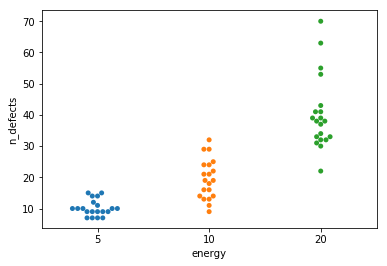

In [3]:
# plotting number of defects for each temperature
%matplotlib inline
sns.swarmplot(x="energy", y="n_defects", data=DataFrame.from_dict(cascades))
# each cascade has various properties, for description check documentation at bottom; to list all run: cascade[0].keys()

/home/utkarsh/miniconda3/envs/csaransh-try/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/utkarsh/miniconda3/envs/csaransh-try/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Adding coordinates in eigen dimensions and convex hulls for cascades...
to ../data/cascadesdb-dl/144.xml          finished.
Adding cluster comparison...
finished.
Defect morphology identification & classification...
<class 'TypeError'>
Continuing with non-fatal error in supervised classification
[[-12.46, -16.23], [-13.23, -18.23], [-10.31, -16.27], [11.69, -7.37], [-12.02, -16.54], [-1.89, -4.15], [2.85, -5.91], [-2.14, 17.57], [-2.42, 18.77], [-11.87, -14.6], [-10.35, -16.93], [-13.68, -17.08], [-5.48, 5.04], [3.71, 19.22], [-2.97, 7.38], [15.65, -4.54], [0.67, -1.63], [15.35, -5.42], [-0.57, 18.08], [6.42, -5.56], [8.52, 11.83], [-12.78, -15.28], [18.85, -6.53], [-13.9, -15.92], [-1.0, 3.86], [-2.41, 1.03], [-5.62, 4.79], [-12.7, -14.88], [-5.77, 11.95], [-2.98, 7.41], [14.9, -6.05], [15.32, -6.02], [-0.08, 17.0], [17.83, -6.55], [-3.02, 3.74], [15.34, -5.99], [-2.93, 11.91], [9.34, 10.98], [16.87, -7.45], [15.17, -5.92], [-0.66, 16.38], [0.33, 19.21], [-4.97, 4.73], [12.97, -8.21],

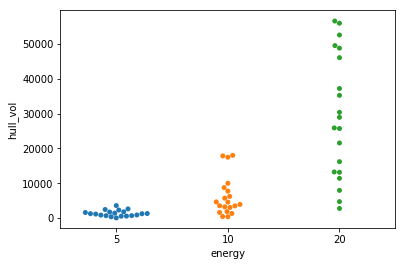

In [4]:
from csaranshpp_ml import analyseAndSaveJs

# adds various other properties to each cascade &
# saves a js file that can be visualized in csaransh web-app as we are doing next
cascades, classes = analyseAndSaveJs(cascades, config, "cdb-W.js")
# plotting cascade volume that was added by csaranshpp_ml
sns.swarmplot(x="energy", y="hull_vol", data=DataFrame.from_dict(cascades))

In [5]:
!cp cdb-W.js apps/CSaransh_files/cascades-data.js
from IPython.display import IFrame
IFrame(src='apps/index.html', width=960, height=800)
# For better rendering load with hosted server:
# run python -m http.server 8080 in a terminal opened in examples directory
# uncomment the below line and comment the previous IFrame line
#IFrame(src='http://localhost:8080/apps/index.html', width=960, height=800)

In [9]:
len(cascades)

60

In [12]:
cascades[0]['n_defects']

{'xyzFilePath': '../data/cascadesdb-dl/07e-cu-5/md.movie-5-4.xyz',
 'id': 'R07e-1',
 'substrate': 'Cu',
 'simulationCode': 'cascadesDbLikeCols',
 'energy': 5,
 'simulationTime': 40,
 'ncell': 48,
 'boxSize': 137.066,
 'origin': [-18.7493, -18.7497, -18.7493],
 'rectheta': 0,
 'recphi': 0,
 'xrec': 0.0006,
 'yrec': 0.0003,
 'zrec': -0.2494,
 'latticeConst': 3.607,
 'temperature': 0,
 'infile': '../data/cascadesdb-dl/126.xml',
 'tags': 'cdb: 07e-cu-5.tar.gz',
 'potentialUsed': 'P10',
 'author': 'A11-Andrea SAND',
 'isPkaGiven': 0,
 'es': 1,
 'originType': 1,
 'error': '',
 'n_defects': 7,
 'n_clusters': 4,
 'max_cluster_size_I': 2,
 'max_cluster_size_V': 2,
 'max_cluster_size': 2,
 'in_cluster_I': 28.5714,
 'in_cluster_V': 85.7143,
 'in_cluster': 57.1429,
 'coords': [[-64.0221, -22.5427, -29.7556, 0, 2, 0],
  [-64.6492, -23.2156, -29.7949, 1, 2, 0],
  [-63.0994, -21.6648, -29.7863, 1, 2, 1],
  [-62.2186, -22.5427, -27.9521, 0, 2, 0],
  [-61.4699, -21.7433, -27.9183, 1, 2, 0],
  [-63.0224

In [11]:
for cascade in cascades:
    print(cascade['energy'], cascade['n_defects'])

5 7
5 9
5 9
5 10
5 9
5 10
5 7
5 10
5 9
5 9
10 9
10 19
10 24
10 29
10 19
10 32
10 13
10 22
10 24
10 14
20 41
20 33
20 22
20 43
20 41
20 30
20 39
20 33
20 31
20 32
5 7
5 14
5 15
5 14
5 10
5 12
5 10
5 11
5 15
5 7
10 29
10 21
10 14
10 25
10 21
10 11
10 16
10 13
10 16
10 18
20 39
20 37
20 32
20 38
20 63
20 38
20 55
20 34
20 70
20 53


In [ ]:
%load ../data/cascadesdb-dl/log-cdb-test.txt

In [ ]:
# demonstrating another way to process the same cascades, gives you slightly more control at the expense of loc
from csaranshpp import processMetaFileNumbers, queryCdbForMetaFileNumbers
metaFileNumbers = queryCdbForMetaFileNumbers(material="W", energyRange=[2, 2], tempRange=["", 1500])
print(metaFileNumbers) # you can select or remove metafiles, add directly in a list after checking cascadesdb
isSuccess, cascades = processMetaFileNumbers(metaFileNumbers, dataDir, config)
writeResultsToJSON(cascades, config) # writes the json file that can be loaded again with json.load()

In [ ]:
# demonstrating another way to process the same cascades, gives you even more control at the expense of loc
from csaranshpp import processXyzFilesInDirGivenMetaFile, queryCdbTodownloadMetaFilesXmlAndXyz

metaFilePaths, xyzDirPaths = queryCdbTodownloadMetaFilesXmlAndXyz(dataDir, material="W", energyRange=[2, 2], tempRange=["", 1500])
cascades = []
for metaFile, xyzDir in zip(metaFilePaths, xyzDirPaths):
    print("processing cascades for: ", metaFile, " present in dir: ", xyzDir)
    isSuccess, cascade = processXyzFilesInDirGivenMetaFile(metaFile, xyzDir, config)
    cascades.append(cascade)
writeResultsToJSON(cascades, config)

optional arguments for querying cascadesdb:
-----------------------------------

applicable to following functions: 

- queryCdbToProcess 
- queryCdbForMetaFileNumbers
- queryCdbTodownloadMetaFilesXmlAndXyz
- queryCdbTodownloadMetaFilesXml

    - *author* (optional): author name to look for in the cascadesDB, comparison is not exact, similar strings are matched (default: "")
    - *doi* (optional): doi to look for in the cascadesDB (default: "")
    - *material* (optional): material to look for in the cascadesDB e.g. Fe, W (default: "")
    - *tempRange* (optional): a list with two values of temperature in Kelvin for more than equal to and less than equal for filtering the data , e.g. [300, 500] will match all the cascades with 300K to 500K, [300, 300] will only match 300K, ["", 500] will match less than 500K (default: ["", ""])
    - *energyRange* (optional): a list with two values of energy of PKA in keV for more than equal to and less than equal for filtering the data , e.g. [1, 5] will match all the cascades with 1keV to 5keV, [1, 1] will only match 1keV, ["", 5] will match less than 5keV (default: ["", ""])
    - *archiveName* (optional): archive name to look for in the cascadesDB, comparison is not exact, similar strings are matched (default: "")

 
optional arguments  for file selection in a dir:
 --------------------------------------------------
 
 aplicable to following functions:
 
 - queryCdbToProcess
 - processMetaFileNumbers
 - processXyzFilesInDirGivenMetaFile
 
    - *prefix* (optional): a list of prefixes for xyz files in the archive, only files that start with one of the prefixes will be included in processing. (default: [])
    - *suffix* (optional): a list of suffixes for xyz files in the archive, only files that end with one of the suffixes will be included in processing. (default: ["xyz"])
    - *excludePrefix* (optional): a list of prefixes for non xyz files in the archive, files that start with one of these prefixes will NOT be included in processing. (default: ["init", "."])
    - *excludeSuffix* (optional): a list of suffixes for non xyz files in the archive, files that end with one of the suffixes will NOT be included in processing. (default: [""])
    - *idStartIndex* (optional): if appending to list that already has cascades then set as cascades in the list, this is to ensure id is unique for each cascade in a list, important only if you view cascades in csaransh web-app(default: 0)    
    - *onlyProcessTop* (optional): return if number of processed cascades are equal to or more than this value (default: 0 (i.e. process all))    
 
 
 all options for config:
 --------------------------------
 
 returned with getDefaultConfig()
  - "csaranshLib" : path to csaransh c++ library most probably compiled with cmake
  - "onlyDefects" : Switch - Compute only the defect coordinates (default: False)
  - "isFindDistribAroundPKA": Switch - compute distribution around pka if pka coordinates are given (default: True)
  - "isFindClusterFeatures": Switch - find cluster features that can be used for pattern matching and classification of clusters later (default: True)
  - "filterZeroSizeClusters": Switch - Ignore clusters that have zero surviving defects. The defects in these clusters are all added by threshold based algorithm (default: False)
  - "isIgnoreBoundaryDefects": Switch - Ignore defects appearing in the unit cells at the boundary. Useful since defects appear at boundary due to PBC if origin / offset is not given properly in MD simulations, one condition where it can be set to False is if offset / origin is 0.25 in bcc (default: True)
  - "isAddThresholdInterstitials": Switch - Add threshold based interstitials over the one found using W-S like algorithm (default: True)
  - "safeRunChecks": Check and ignore files with anomalous number or proportion of defects (default: True)
  - "thresholdFactor": threshold factor for threshold based interstitials (threshol value will be factor * latticeConstant), applicable only if threshold based interstitials are allowed. (default: 0.345)
  - "extraDefectsSafetyFactor": safety factor for checks, lower value implies stricter checks to ignore files. Only matters if safety checks are not disabled altogether. (default: 50.0),
  - "logFilePath": (default log-csaransh-pp-cpp.txt)
  - "outputJSONFilePath": only needed if saving json file, (default cascades-data-py.json)
  - "logMode": (default: warning and error (2 + 4 = 6)) can be set by input parameters to getDefaultConfig function. Its paramters can be any combination of the following strings: 
    "none", "info", "warning", "error", "debug", "all"
    enabling the logging for those messages.
    example call: getDefaultConfig("info", "warning", "error")

All keys of the resulting cascades
------------------------------------------------

- Input
    - xyzFilePath
    - id : possibly unique number for each cascade in the json list.
    - substrate : Material Formula e.g. W, Fe etc.
    - energy : energy of PKA for the cascade
    - simulationTime
    - ncell : number of cells in the simulation box
    - boxSize : simulation box size
    - origin : offset or origin given in MD simulation
    - rectheta : angle for PKA
    - recphi : angle for PKA
    - xrec : position for PKA
    - yrec : position for PKA
    - zrec : position for PKA
    - latticeConst
    - temperature
    - infile : input or meta file
    - tags : any text that can be given in input for use with filtering or grouping and comparison in statistics
    - potentialUsed
    - isPkaGiven : is position of pka was given as input while processing
    - originType : 0 (given), 1 (estimated) ,  2 (both were tried)
    - simulationCode: Lammps, Parcas, Lammps-disp, cascadesdblikecols

- output scalar values added by csaranshpp:
    - error : error message while processing if any
    - n_defects : number of defects found
    - n_clusters : number of clusters found
    - max_cluster_size_I : maximum size of the interstitial cluster 
    - max_cluster_size_V : maximum size of the vacancy cluster 
    - max_cluster_size : maximum size of a cluster 
    - in_cluster_I : proportion of interstitials in the clusters
    - in_cluster_V : proportion of vacancies in the clusters
    - in_cluster : proportion of defects in the clusters
    
- output lists added by csaranshpp:
    - coords : list of coordinates, each item is [x, y, z, isIntersitial, clusterId, isSurviving], clusterId is zero if defect is single e.g. [3.5, 2.45, -1.4, 0, 2, 1] is a surviving vacancy in cluster 2. 
    - clusters : dictionary of cluster ids each having list of indices that correspond to defect coordinates that belong to that cluster id. e.g. {'2': [11, 2, 34], '206': [9, 1, 7, 124]}, there are two clusters with ids '2' and '206' having 3 and 4 defects respectively. The coordinates for defects in cluster-id '2' can be found in coords[11], coords[2], coords[34].
    - clusterSizes : surviving number of defects for each cluster-id. negative values imply the vacancy cluster. e.g. {'2': -3, '206': 2} implies that there are two clusters(ids: '2','206'). '2' has three surviving vacancies while '206' has two surviving interstitials.
    - features : The distance and angle histogram features for each cluster-id representing its shape. Check the research article on classification of defect clusters for algorithm (https://doi.org/10.1016/j.commatsci.2019.109364).
    - dumbbellPairs : The interstitial-vacancy pair for interstitials e.g. [[4, 12], [6, 19], [9, 11]], there are three interstitial-vacancy pairs. The position of first pair is coords[4] as interstitial and coords[12] as corresponding vacancy. The other interstitial for the first dumbbell would be coords[5].
    - distancesI : distance distribution of interstitials from PKA if pka position was given as input. 
    - distancesV : distance distribution of vacancies from PKA if pka position was given as input. 
    - anglesI : angle distribution of interstitials from PKA if pka position was given as input. 
    - anglesV : angle distribution of vacancies from PKA if pka position was given as input.
    
- added by csaranshpp-ml:
    - eigen_coords : coordinates of defects in principle components (PCA). Ideal for plotting the cascade in 2D.
    - eigen_pka : 3D coordinates of pka in principle components (PCA) found for coords.
    - eigen_var : variance explained by first, second and third principle component e.g. [0.5, 0.3, 0.2]. A high value in first implies the cascade is spread in one direction way more than others, while a high value in first + second would imply it is a planar cascade. A value of 0.95 or above in first index can mean highly linear cascade while higher than 0.95 in first two would mean planar.
    - eigen_features : 
    - dclust_coords : density clusters found using dbscan, the density clusters are bigger islands of densities surrounded by very sparse regions. The number of dense regions of vacancies has a good correlation with number of subcascades.
    - dclustI_count : number of interstitial density cluster islands.
    - dclust_sec_impact : The proportion of defects in the second biggest density cluster of vacancies. This correspond to the impact of secondary sub-cascade.
    - hull_vol : cascade hull volume.
    - hull_area : cascade hull area.
    - hull_density : cascade hull density.
    - hull_vertices : cascade hull vertices.
    - hull_simplices : cascade hull simplices.
    - hull_nvertices : cascade hull number of vertices.
    - hull_nsimplices : cascade hull number of simplices.
    - clust_cmp : clusters with similar shape for each cluster id, based on histogram features of 'angle', 'dist' and 'both'.
    - clust_cmp_size : clusters with similar shape and size for each cluster id, based on histogram features of 'angle', 'dist' and 'both'.
    - clusterClasses : cluster shape class for each cluster id. To know the typical shape for each cluster check the research article on classification of defect clusters (https://doi.org/10.1016/j.commatsci.2019.109364) .